In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Lecture 02: Advanced options for ``ggplot``
The goal for today's lecture are:

* Learn how to use [statistical transformations](#Statistical-Transformations) and [position adjustments](#Position-Adjustments) to transform data while plotting.
* Use different [coordinate systems](#Coordinate-Systems) to make plots more interpretable.
* Try these ideas out on a real data set.

These slides correspond to sections [3.6](http://r4ds.had.co.nz/data-visualisation.html#geometric-objects) through [3.9](http://r4ds.had.co.nz/data-visualisation.html#the-layered-grammar-of-graphics) of the book.

# Statistical Transformations
Recall the **diamonds** data set.

In [2]:
print(diamonds)

# A tibble: 53,940 x 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1 0.230 Ideal     E     SI2      61.5  55.0   326  3.95  3.98  2.43
 2 0.210 Premium   E     SI1      59.8  61.0   326  3.89  3.84  2.31
 3 0.230 Good      E     VS1      56.9  65.0   327  4.05  4.07  2.31
 4 0.290 Premium   I     VS2      62.4  58.0   334  4.20  4.23  2.63
 5 0.310 Good      J     SI2      63.3  58.0   335  4.34  4.35  2.75
 6 0.240 Very Good J     VVS2     62.8  57.0   336  3.94  3.96  2.48
 7 0.240 Very Good I     VVS1     62.3  57.0   336  3.95  3.98  2.47
 8 0.260 Very Good H     SI1      61.9  55.0   337  4.07  4.11  2.53
 9 0.220 Fair      E     VS2      65.1  61.0   337  3.87  3.78  2.49
10 0.230 Very Good H     VS1      59.4  61.0   338  4.00  4.05  2.39
# ... with 53,930 more rows


Let us create a **bar chart** using the **cut** variable. Recall that this is done by the ``geom_bar`` geometry.

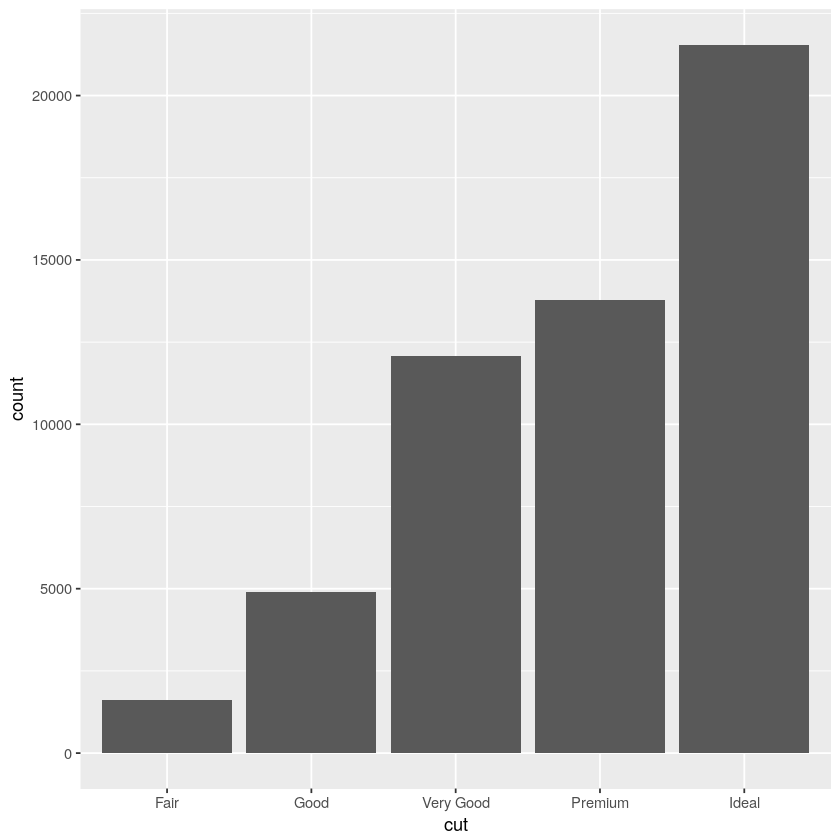

In [3]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut))

This aesthetic looks different than what we have seen before. We didn't supply a `y` variable, and the `y` variable in the plot, **count**, is not even a variable in our data set. 

So we see that a **bar chart** differs quite fundamentally from a **scatter plot**. A scatter plot uses the raw data variables directly. A bar chart applies a **statistical transformation** (`stat_count` in our case) to create the counts and then plots the counts vs the raw variable (`cut` in our case).

How do we know that `geom_bar` uses `stat_count` as the default transformation? You can type `?geom_bar` in RStudio or consult the [online documentation](http://ggplot2.tidyverse.org/reference/geom_bar.html).

Geoemetries and statistical transformations comes in pairs. E.g.,

* `geom_point` and `"identity"`
* `geom_smooth` and `stat_smooth`
* `geom_bar` and `stat_count`

These are the defaults. Although it is usually unnecessary, they can be overridden.

Let's create create a simple synthetic data set. To do this we use the `tribble` command, which is a streamlined way to manually enter data in R. We'll cover it later on.

In [4]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)
print(demo)

# A tibble: 5 x 2
  cut        freq
  <chr>     <dbl>
1 Fair       1610
2 Good       4906
3 Very Good 12082
4 Premium   13791
5 Ideal     21551


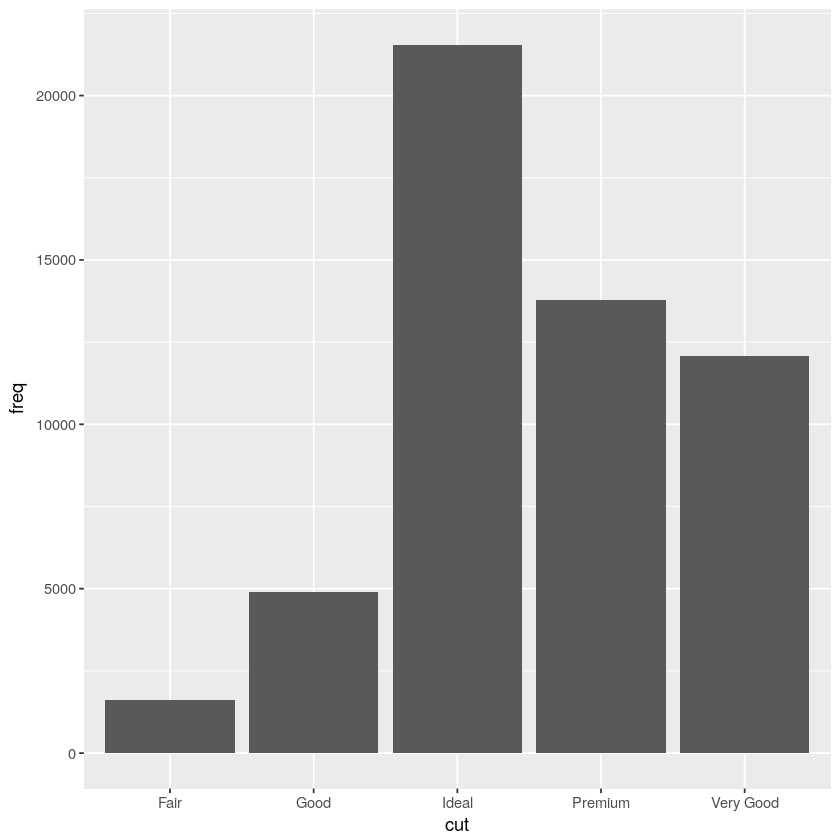

In [5]:
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

`geom_col` is used when you wants the bar heights to represent values in the data. The plot below shows the total **price** (in millions of dollars) of the diamonds in each **cut** category.

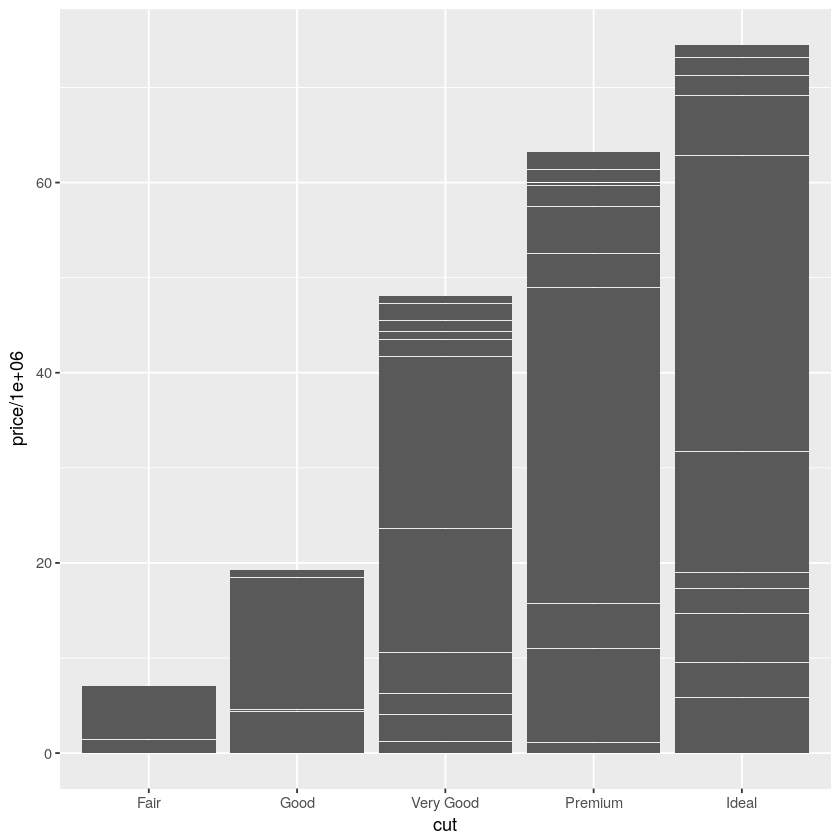

In [6]:
ggplot(data = diamonds) +
    geom_col(mapping = aes(x = cut, y = price / 1e6))

There are a lot of transformations that `geom_bar` is doing internally to create the plot above. One way to generate the plot by doing explicit data transformations is as follows. Don't worry about the details; we will cover data transformations (like `select`, `group_by`, `summarise`) later.

In [7]:
my_tibble <- select(diamonds, cut, price) %>%
    group_by(cut) %>%
    summarise(total_price_millions = sum(price)/1e6)
print(my_tibble)

# A tibble: 5 x 2
  cut       total_price_millions
  <ord>                    <dbl>
1 Fair                      7.02
2 Good                     19.3 
3 Very Good                48.1 
4 Premium                  63.2 
5 Ideal                    74.5 


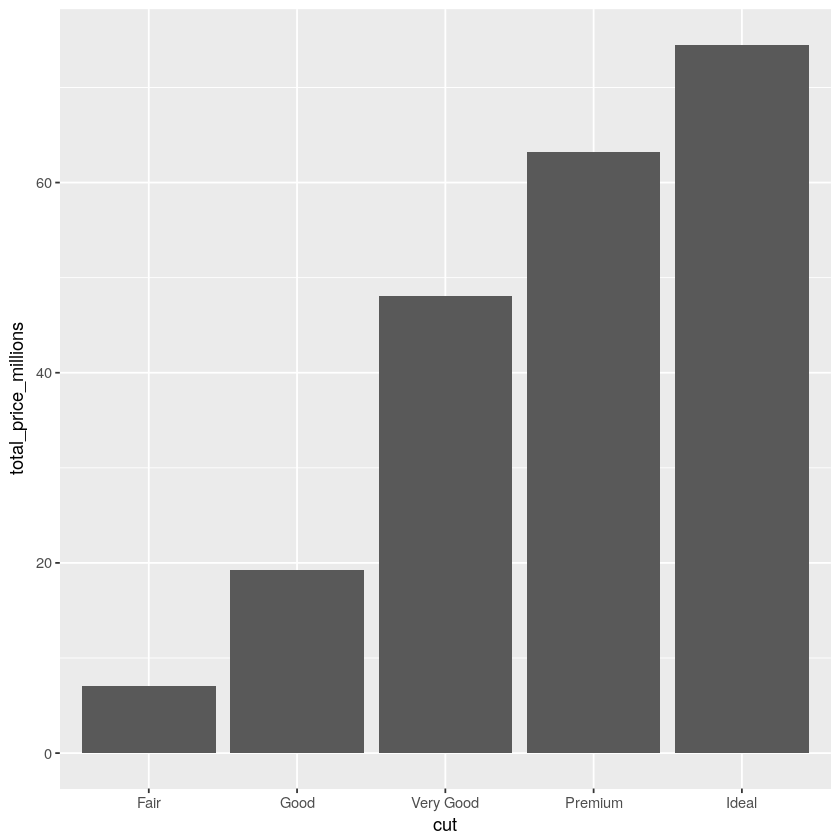

In [8]:
ggplot(data = my_tibble) +
    geom_bar(mapping = aes(x = cut, y = total_price_millions), stat = "identity")

## Position Adjustments
Let us see what happens when we map the **color** aesthetic to the **cut** variable.

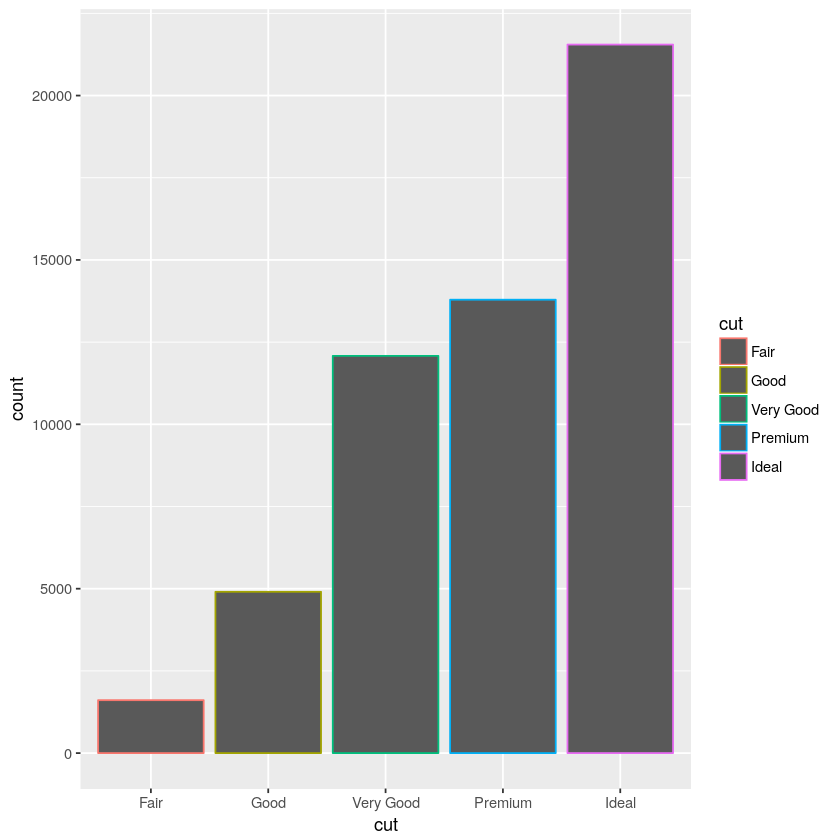

In [9]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, color = cut))

It just changed the boundary color. Using the **fill** aesthetic might be better.

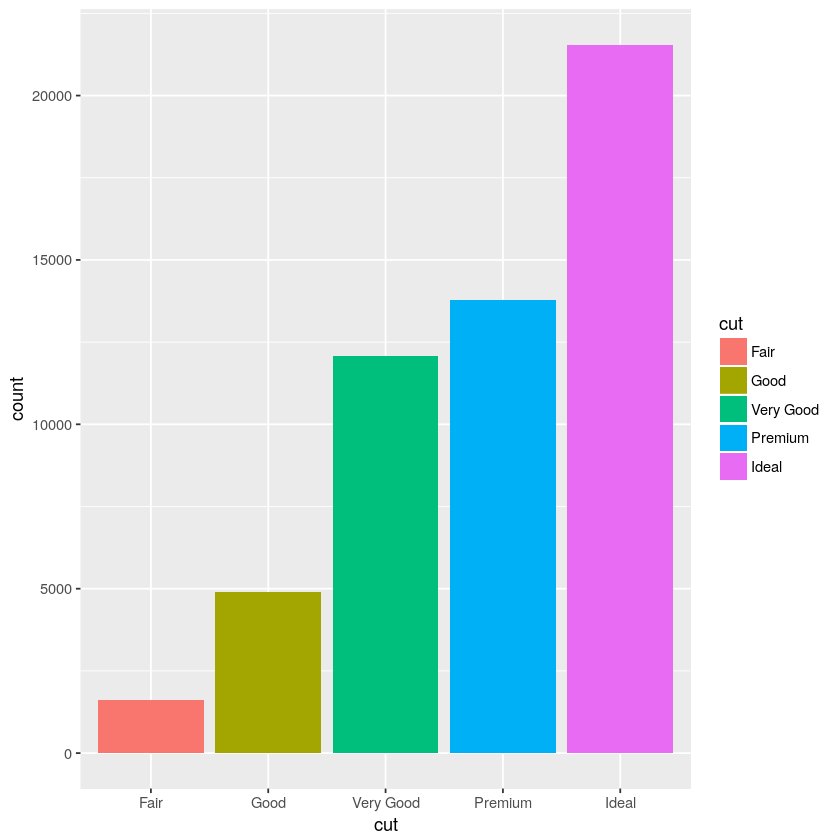

In [10]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut))

What happens when we map the `fill` aesthetic to some variable other than **cut**, say **clarity**?

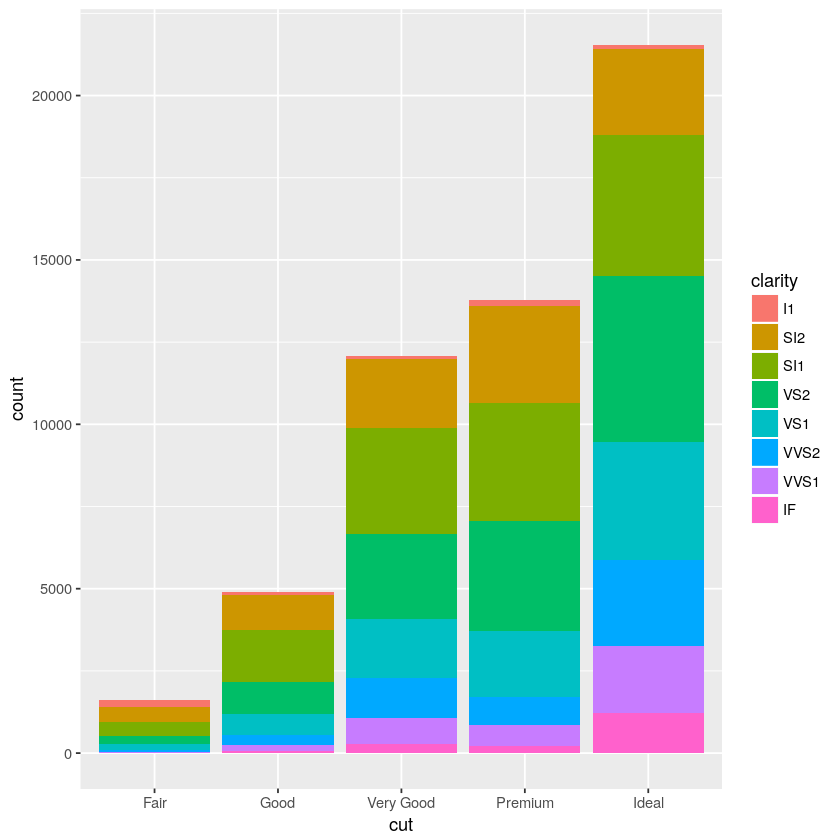

In [11]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity))

If stacking is not the behavior you want, you can set the **position** argument to something other than `"stack"`.

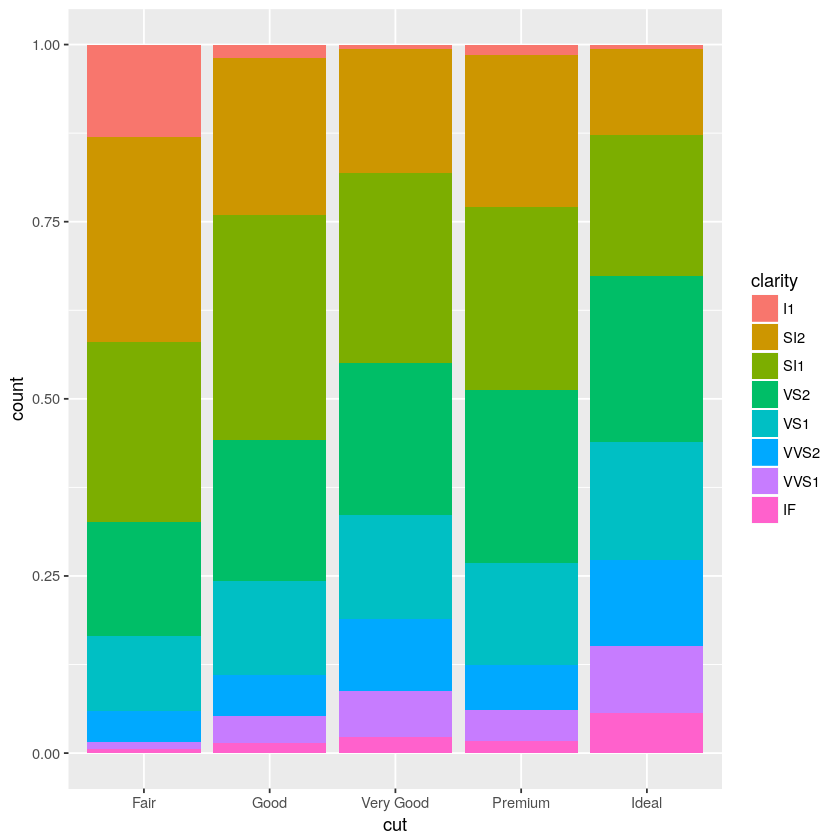

In [12]:
ggplot(data = diamonds) + 
    geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill") # stacks but shows proportions

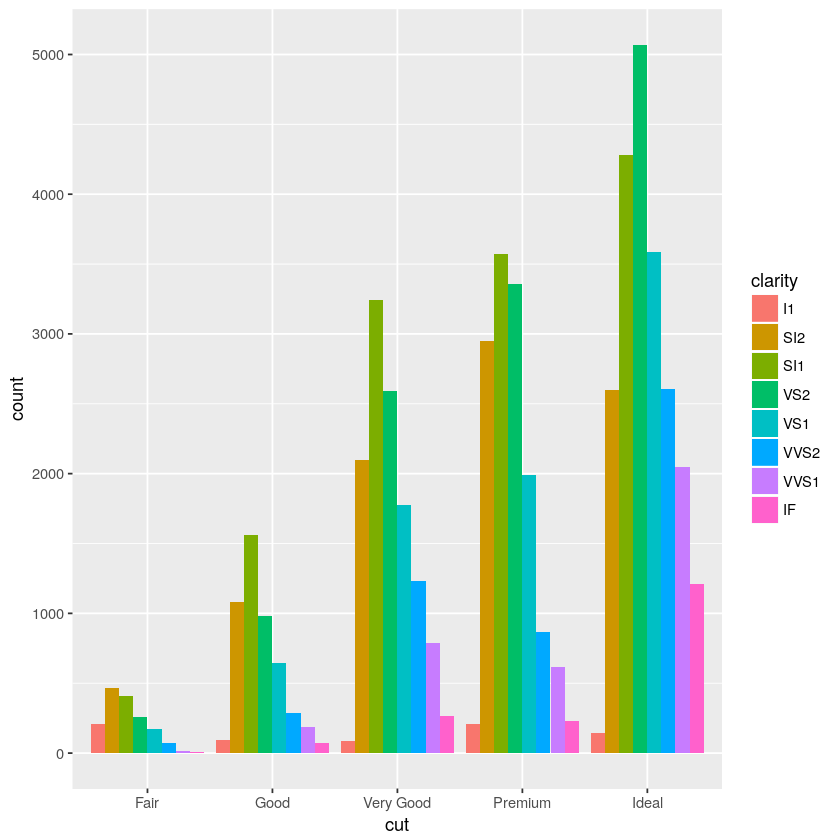

In [13]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") # put the bars side by side

There is a position adjustment that is less useful in bar plots but can be useful in scatter plots.

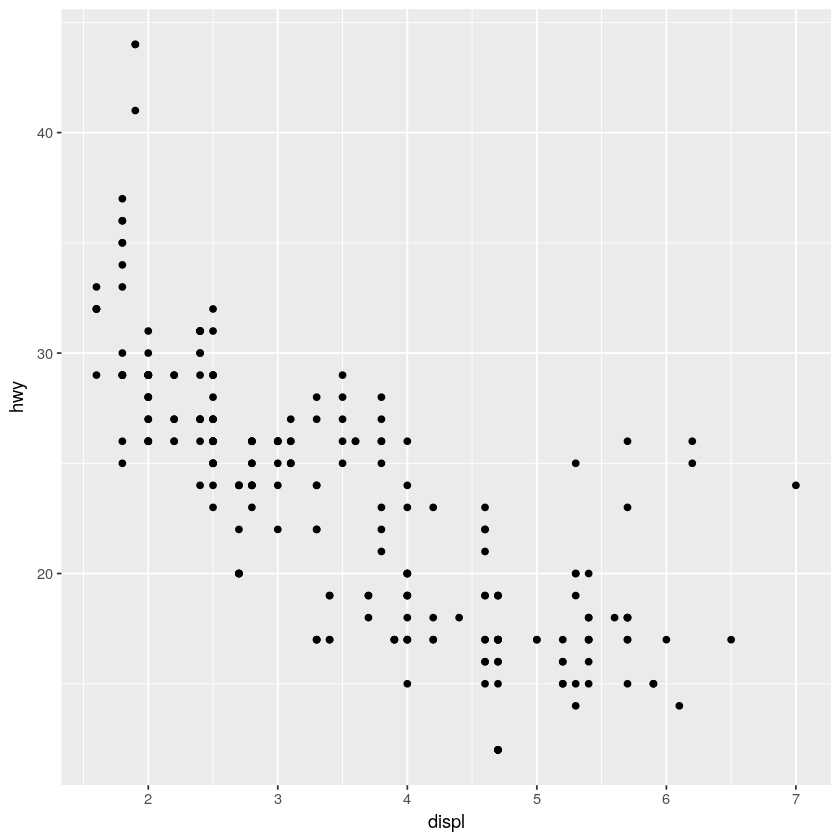

In [14]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

It's difficult to see but there are overlapping points in the plot above. For example, the lowest point (point with the lowest `hwy` value) actually consists of 5 overlapping points: 2 SUVs and 3 pickup trucks.

In [15]:
filter(mpg, hwy == 12)

  manufacturer model               displ year cyl trans      drv cty hwy fl
1 dodge        dakota pickup 4wd   4.7   2008 8   auto(l5)   4   9   12  e 
2 dodge        durango 4wd         4.7   2008 8   auto(l5)   4   9   12  e 
3 dodge        ram 1500 pickup 4wd 4.7   2008 8   auto(l5)   4   9   12  e 
4 dodge        ram 1500 pickup 4wd 4.7   2008 8   manual(m6) 4   9   12  e 
5 jeep         grand cherokee 4wd  4.7   2008 8   auto(l5)   4   9   12  e 
  class 
1 pickup
2 suv   
3 pickup
4 pickup
5 suv   

Let's see if the overlapping points show up when we use the **jitter** position adjustment in a normal scatter plot.

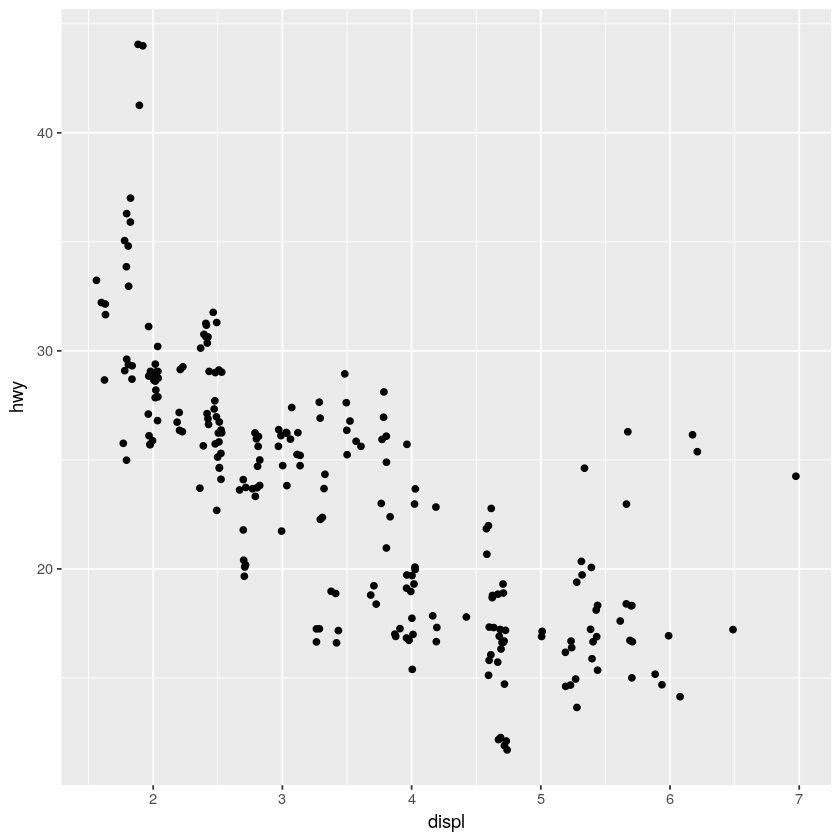

In [16]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

`geom_jitter` is just a shorthand for `geom_point(position = "jitter")`

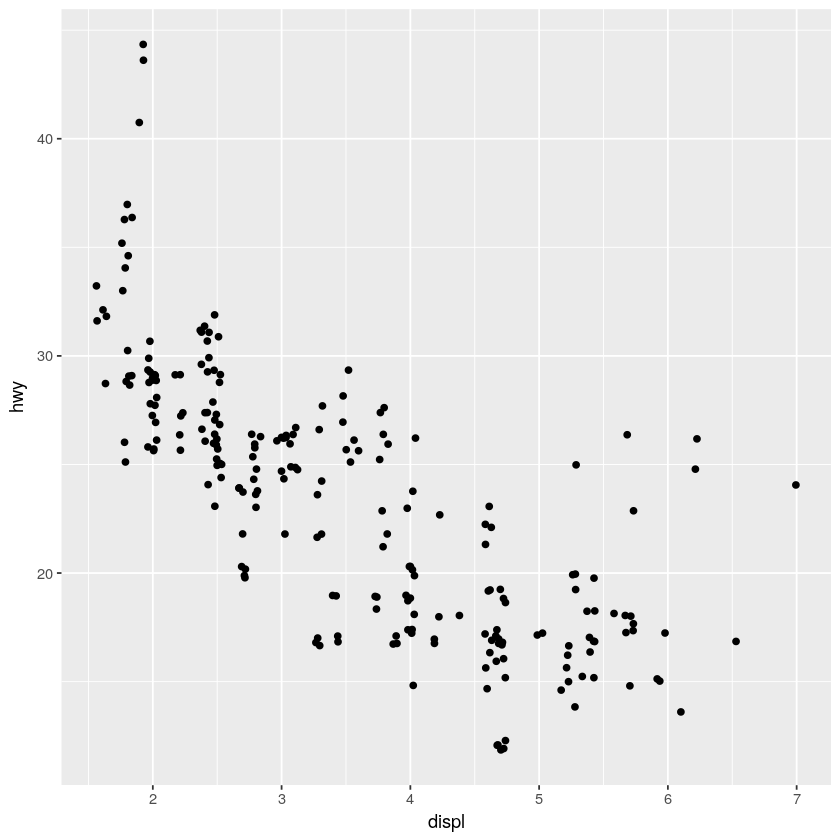

In [17]:
ggplot(data = mpg) +
    geom_jitter(mapping = aes(x = displ, y = hwy))

# Coordinate Systems
Returning to the bar graph from above:

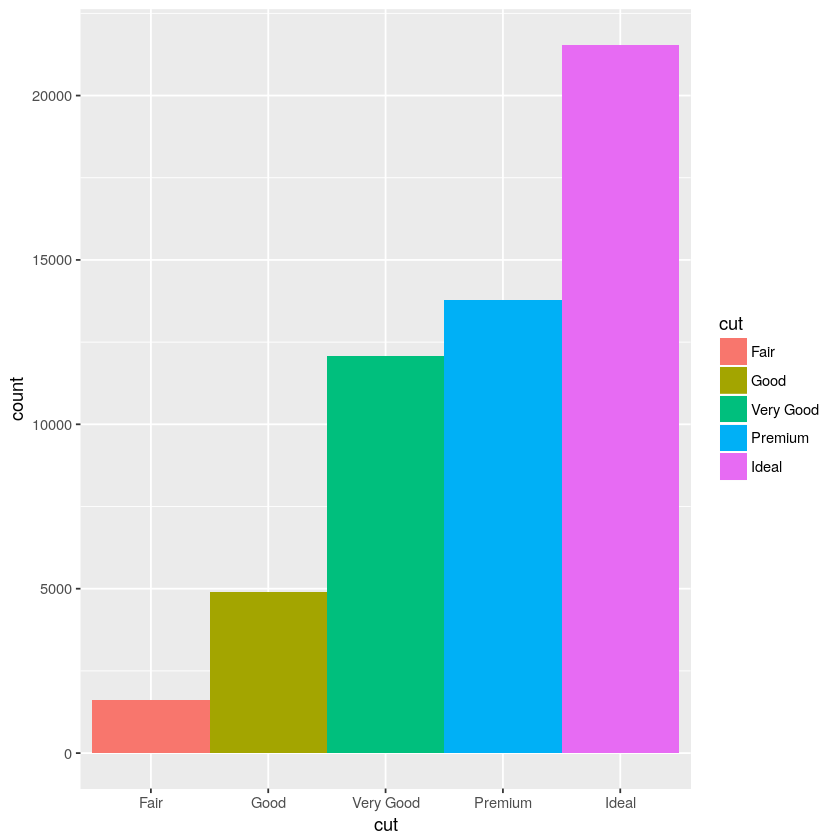

In [18]:
(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut), width = 1)) # set width so that the bars touch

In some cases a horizontal bar chart might be desirable. This amounts to simply flipping the $x$ and $y$ axes. Using `ggplot()`, this becomes a one-liner:

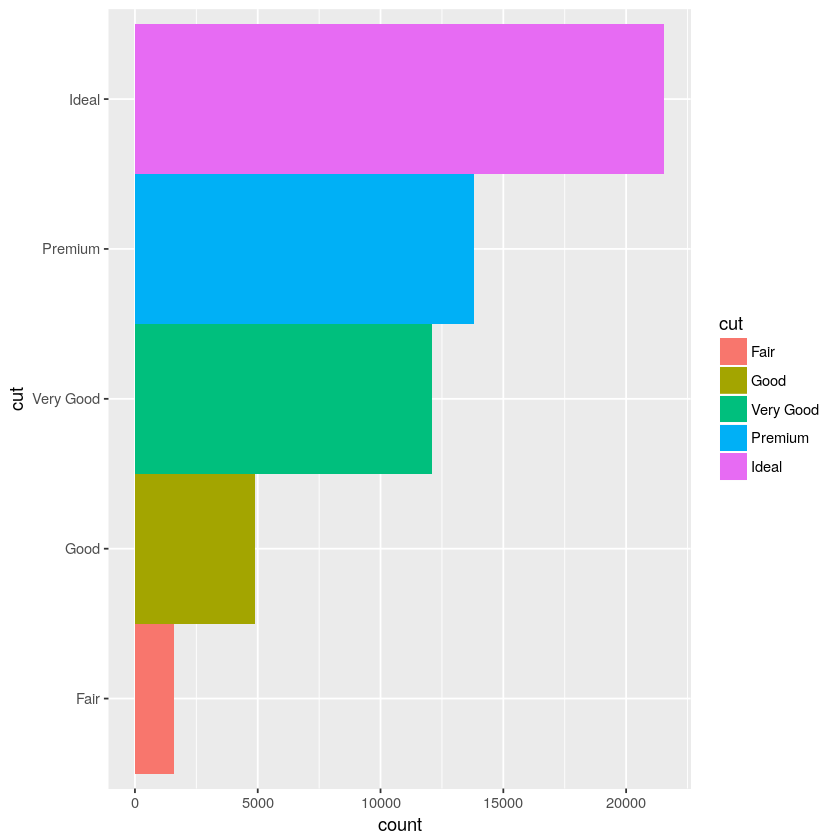

In [19]:
bar + coord_flip()

A **pie chart** is a circular chart where the angle of each wedge is proportional to the frequency of each category. To get a pie chart, we first create a **stacked bar chart**:

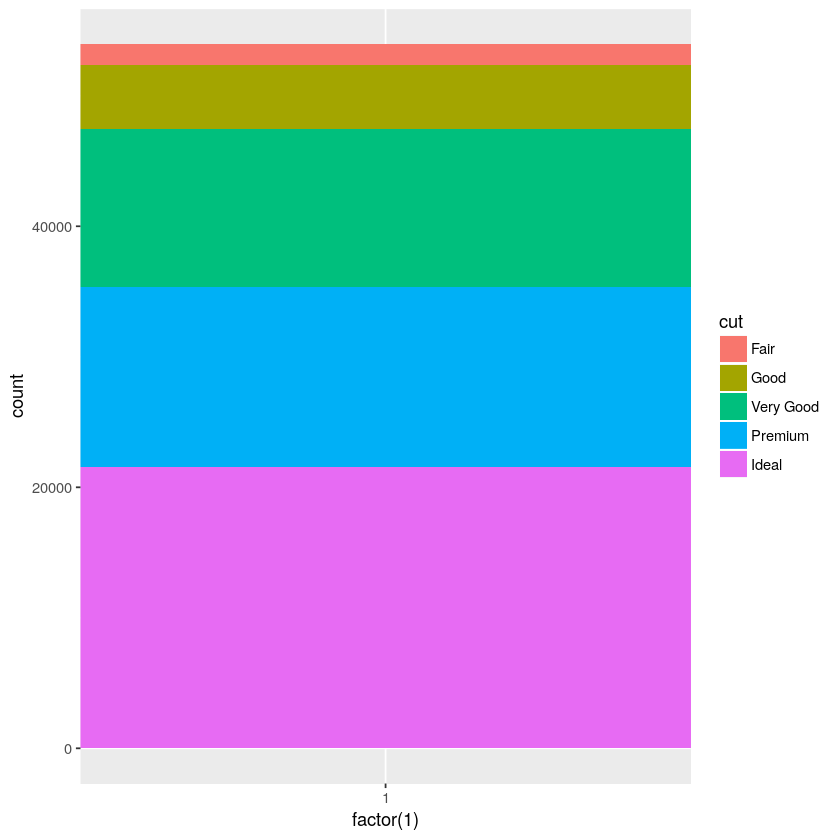

In [20]:
(bar_stacked <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = factor(1), fill = cut), width = 1)) # set width so that the bars touch

Then, we plot in it polar coordinates, assigning the angle value $\theta$ to $y$:

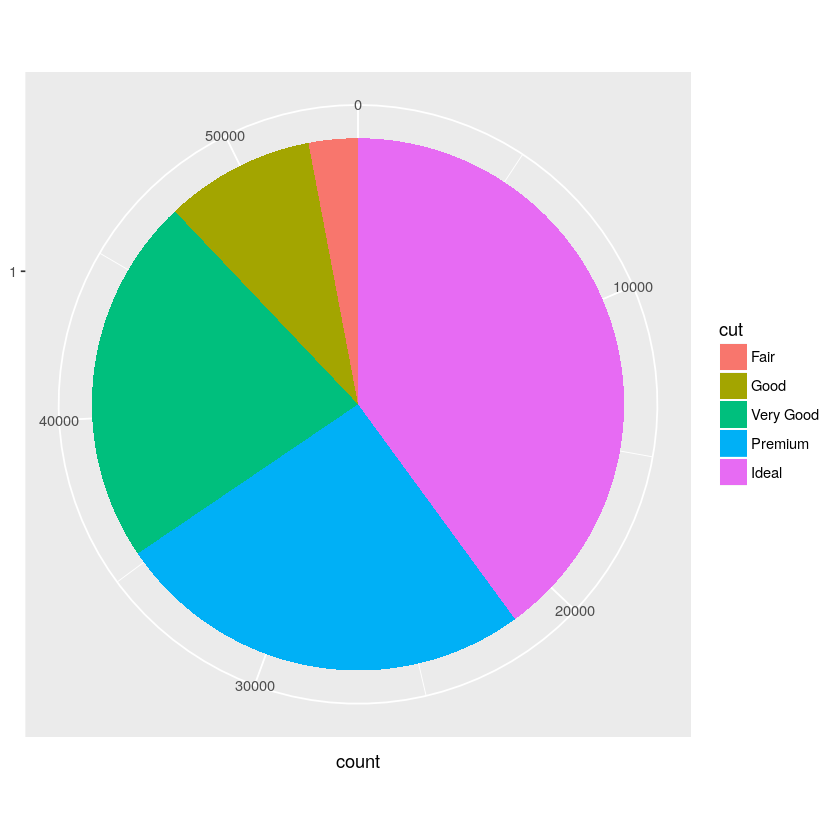

In [21]:
bar_stacked +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar(theta = "y") # change to polar coordinates to get a pie chart
                             # "y" (in quotes) is required here

Notice that we mapped the Y axis of the bar chart to the angle **theta**. By default, it will map to the radial coordinate giving us a **bullseye chart**.

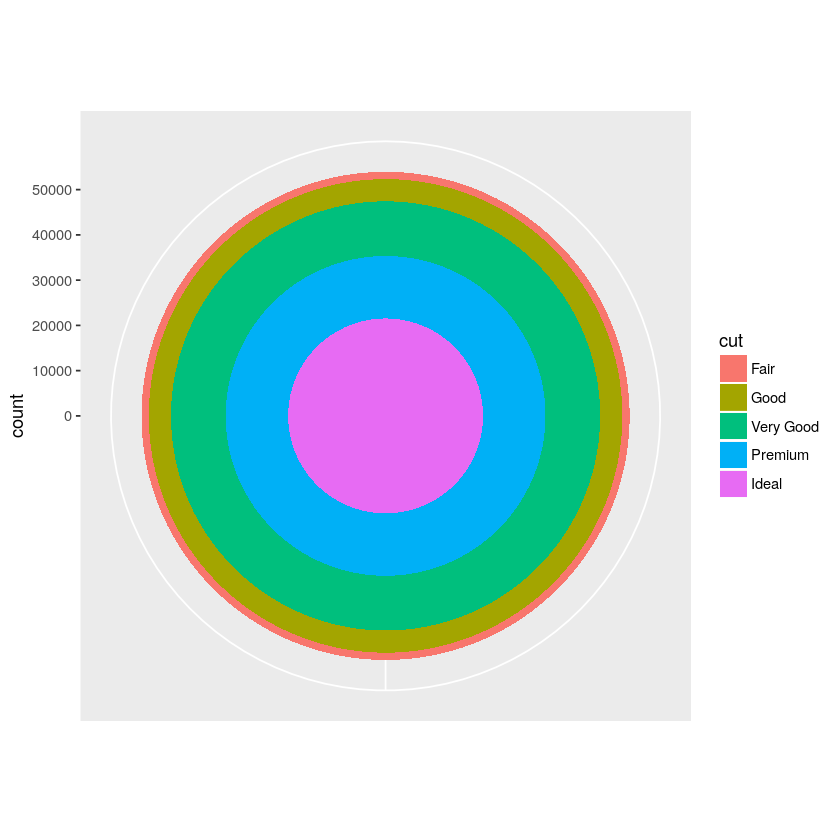

In [22]:
bar_stacked +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar() # change to polar coordinates to get a pie chart

A **Coxcomb chart** is another way to represent data in polar coordinates. Instead of setting the radius to be proportional to frequency, we will keep the radius constant and make *area* proportional to frequency.

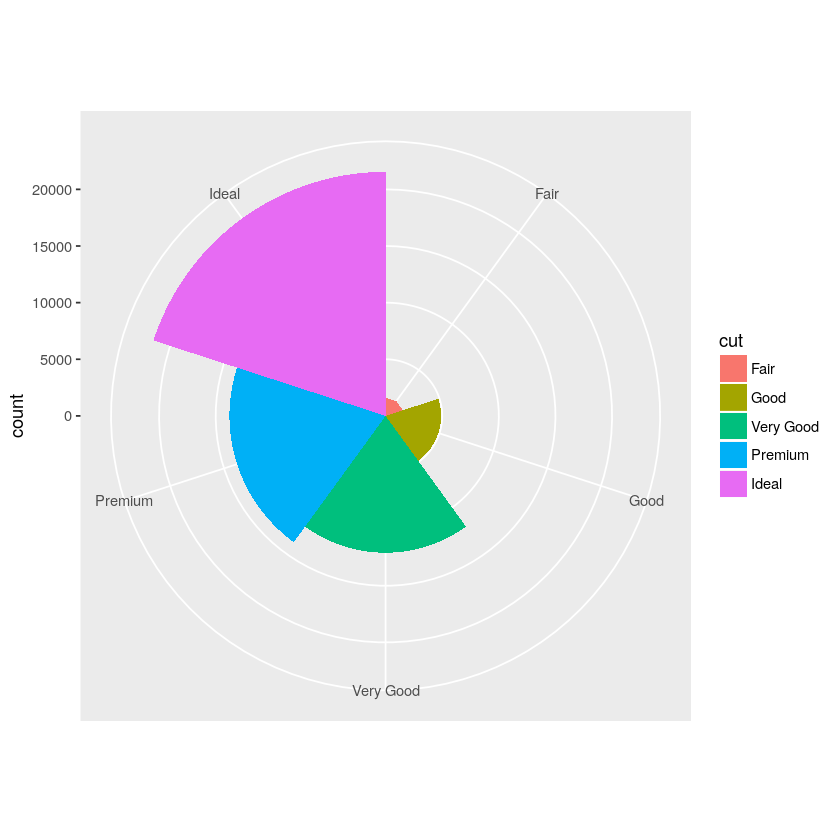

In [23]:
bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar() # change to polar coordinates to get a Coxcomb chart

## The overall `ggplot` syntax
Now you have learned about all elements of the following ggplot template:

```r
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

# Additional `ggplot` topics
Here are a few additional topics that you might find useful as you delve deeper into ggplot.

## Histograms and density estimation
You can easily produce histograms and kernel density estimates using the same approach.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


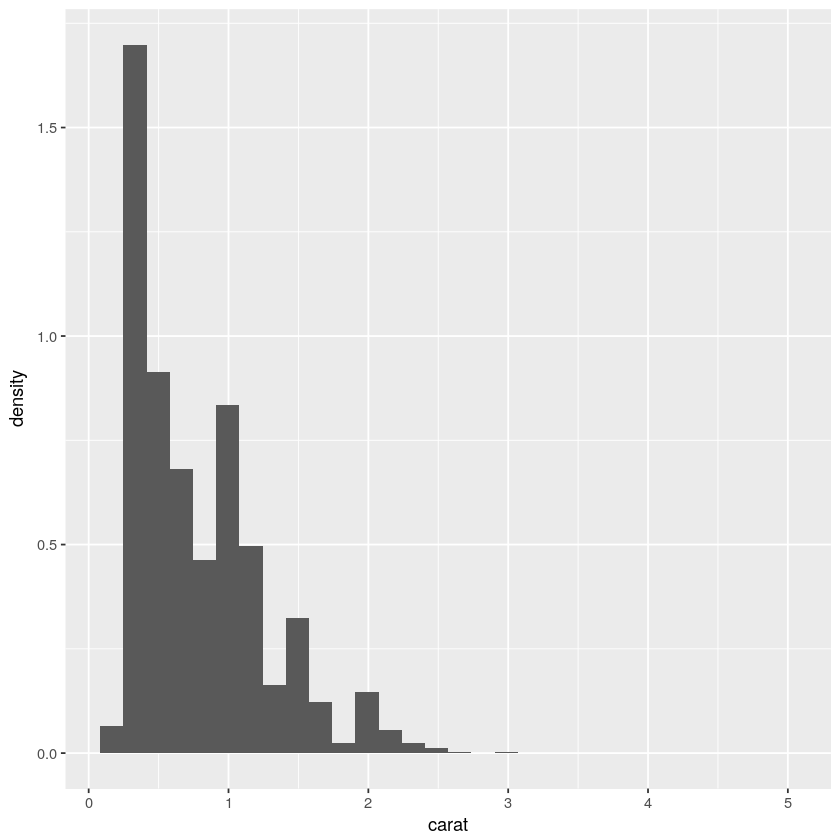

In [24]:
ggplot(diamonds, aes(x=carat, y=..density..)) + geom_histogram()

Choice of binwidth is very important when plotting histograms. `ggplot` intentionally does something basic to force you to think about this choice:

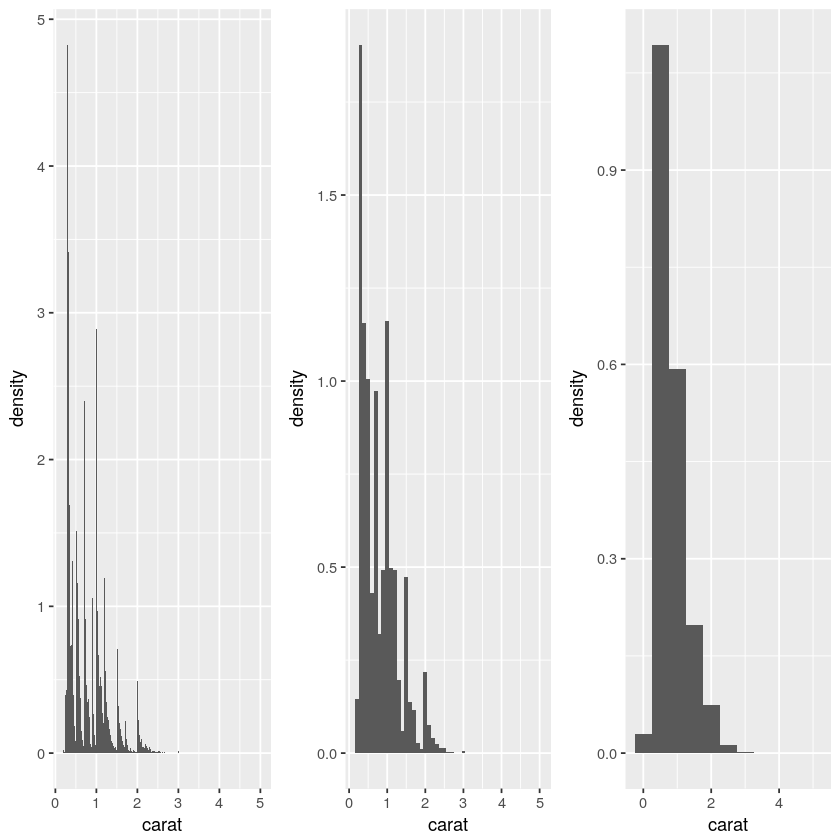

In [25]:
p = ggplot(diamonds, aes(x=carat, y=..density..))
p1 = p + geom_histogram(binwidth=.01)
p2 = p + geom_histogram(binwidth=.1)
p3 = p + geom_histogram(binwidth=.5)
gridExtra::grid.arrange(p1, p2, p3, ncol=3)

Here I also used the `grid.arrange` command in the `gridExtra` package to combine multiple plots.

In [26]:
p = (p + geom_histogram(color = "grey30", fill = "white") + geom_density() )

## Labeling and titling
Adding labels and titles is extremely important when publishing plots. An uninterpretable plot is worse than no plot at all!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 126 rows containing non-finite values (stat_bin).”Warning message:
“Removed 126 rows containing non-finite values (stat_density).”

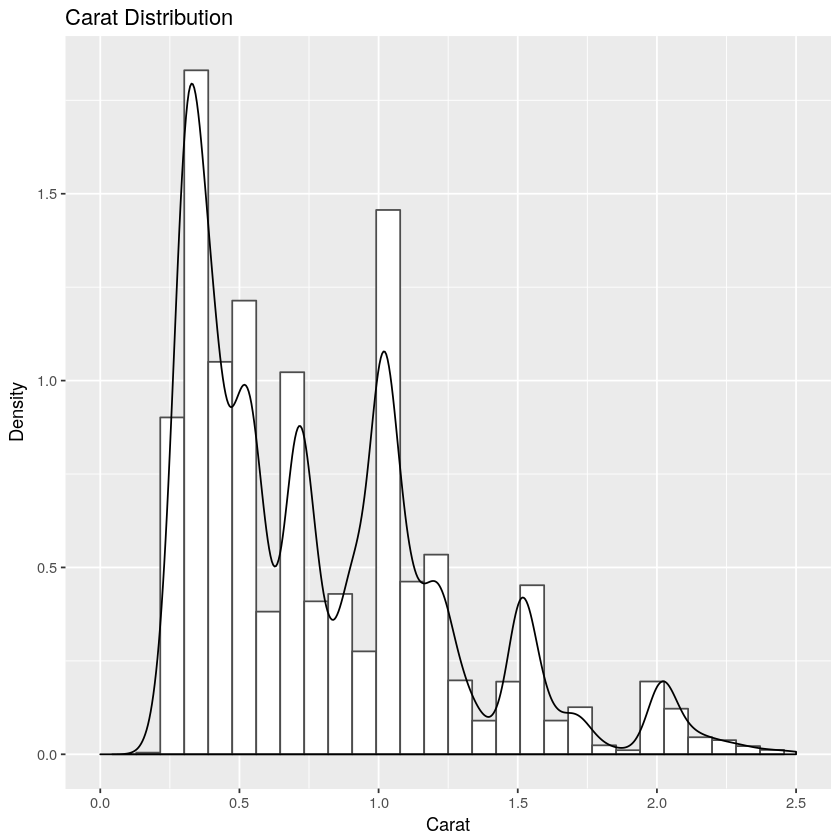

In [27]:
(p = p + ggtitle("Carat Distribution") + xlab("Carat") + ylab("Density") + xlim(c(0,2.5)))

## Theming
The default look of `ggplot` is an acquired taste (to some). Fortunately, almost every aspect of the appearance can be configured. Even more fortunately, people have done this in a variety of styles. We'll use the `ggthemr` package to quickly switched between different themes.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 126 rows containing non-finite values (stat_bin).”Warning message:
“Removed 126 rows containing non-finite values (stat_density).”

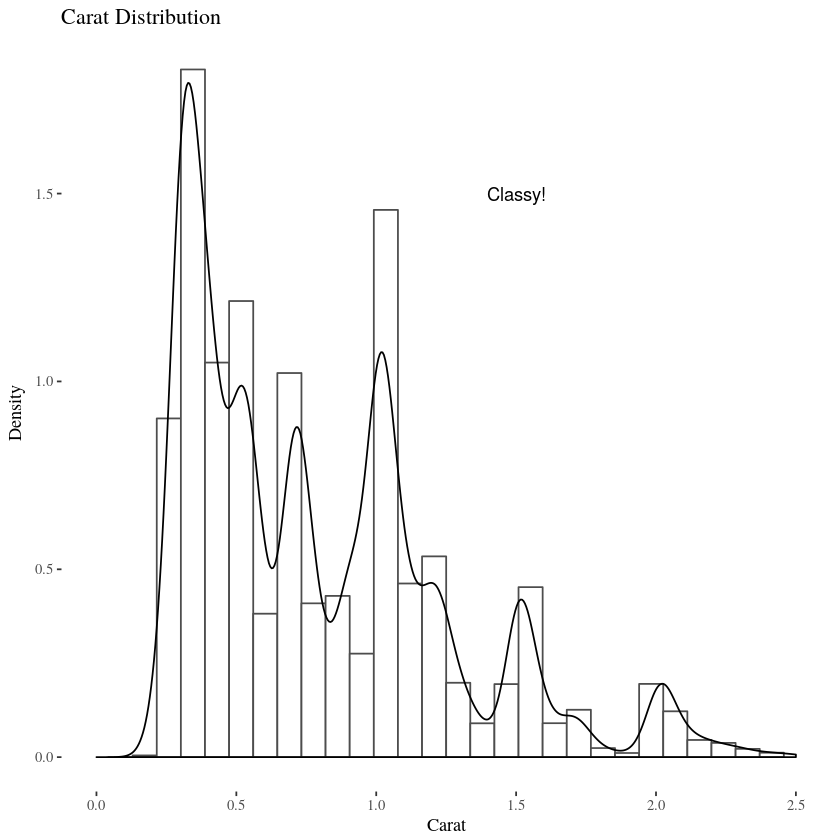

In [28]:
# install.packages("ggthemes")
library(ggthemes)
p + theme_tufte() + annotate("text", x=1.5, y=1.5, label="Classy!")

Sometimes histograms can be complemented with markers for mean, etc.:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 126 rows containing non-finite values (stat_bin).”Warning message:
“Removed 126 rows containing non-finite values (stat_density).”

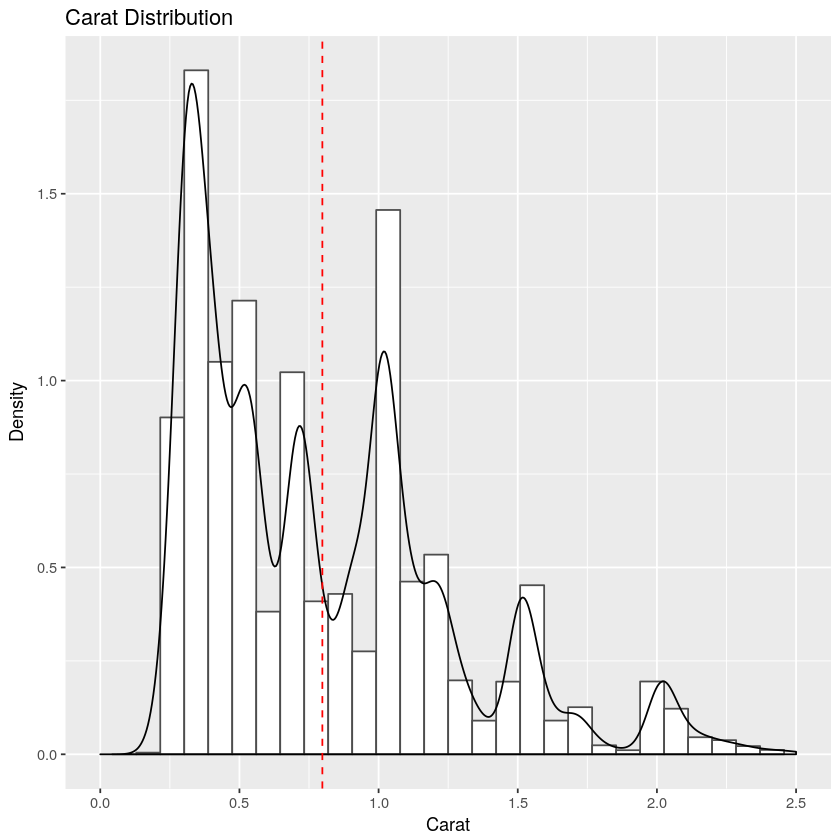

In [29]:
p + geom_vline(xintercept = mean(diamonds$carat), linetype="dashed", color="red")

## Coordinate transformations
Some data are more naturally plotted on a different scale. To accomplish this in ggplot, we use the `scale_*` functions.

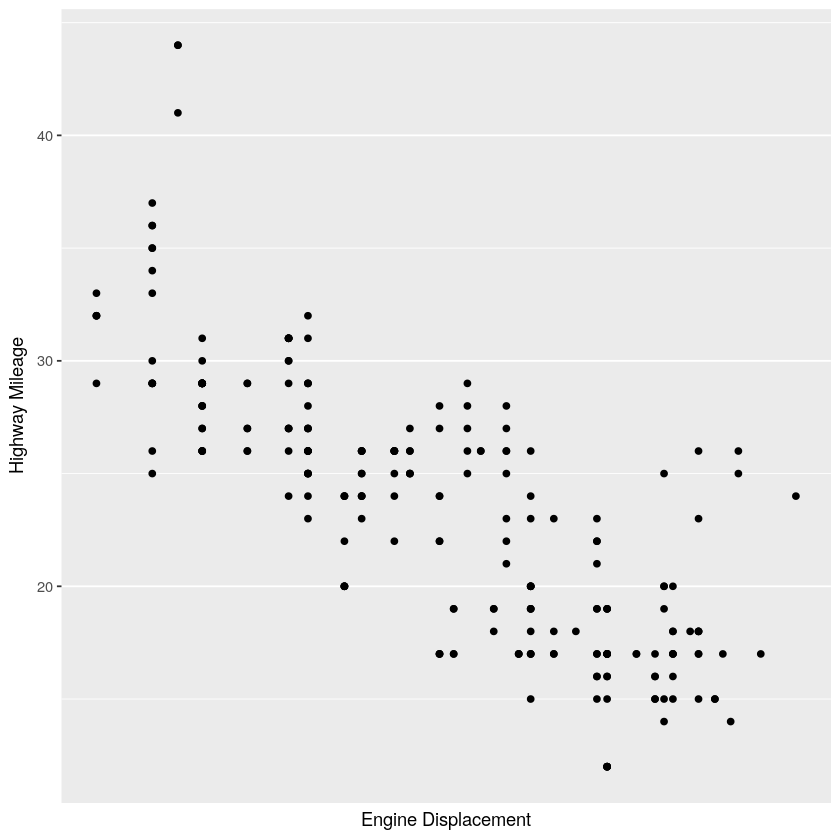

In [30]:
ggplot(mpg, aes(x=displ, y=hwy)) + geom_point() + 
    scale_x_log10("Engine Displacement") + 
    scale_y_continuous("Highway Mileage")